In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

In [51]:
sk_best = SelectKBest(chi2, 10)
sk_best.fit(x, y)

SelectKBest(k=10, score_func=<function chi2 at 0x1a15019b70>)

In [52]:
sk_best.get_support()

array([False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [53]:
len(sk_best.get_support())

51

In [54]:
new_x = x.iloc[:, sk_best.get_support()]
new_x.head()

,review_count,0.5m_count,1m_count,2m_count,2m_count_similar,3m_count,3m_count_similar,is_fastfood,income,is_chain
0,29.0,12,18,55,25,112,36,True,53800.0,True
1,182.0,21,44,98,23,167,35,False,84000.0,True
2,99.0,5,30,80,24,136,34,False,27835.0,True
3,21.0,9,32,83,16,241,30,False,42807.0,True
4,109.0,26,59,112,23,148,36,True,103562.0,True


In [55]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [56]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('Accuracy: ',tree_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test.values,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test.values, y_pred))
dt_scores = cross_val_score(tree_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.758672699849
Precision:  0.533333333333
Recall:  0.514619883041
F1 Score:  0.52380952381
Confusion Matrix:
 [[415  77]
 [ 83  88]]
Avg. 10-fold Cross Validation Accuracy:  0.732570159793


In [57]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Accuracy: ',rf_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(rf_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.794871794872
Precision:  0.649572649573
Recall:  0.444444444444
F1 Score:  0.527777777778
Confusion Matrix:
 [[451  41]
 [ 95  76]]
Avg. 10-fold Cross Validation Accuracy:  0.790838277582


In [58]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train, y_train)
y_pred = ab_clf.predict(x_test)
print('Accuracy: ',ab_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(ab_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.800904977376
Precision:  0.678899082569
Recall:  0.432748538012
F1 Score:  0.528571428571
Confusion Matrix:
 [[457  35]
 [ 97  74]]
Avg. 10-fold Cross Validation Accuracy:  0.805325228406


In [59]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
print('Accuracy: ',knn_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(knn_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.734539969834
Precision:  0.477477477477
Recall:  0.309941520468
F1 Score:  0.375886524823
Confusion Matrix:
 [[434  58]
 [118  53]]
Avg. 10-fold Cross Validation Accuracy:  0.706620136134


In [60]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred = nb_clf.predict(x_test)
print('Accuracy: ',nb_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(nb_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.757164404223
Precision:  0.5625
Recall:  0.263157894737
F1 Score:  0.358565737052
Confusion Matrix:
 [[457  35]
 [126  45]]
Avg. 10-fold Cross Validation Accuracy:  0.736489462381


In [61]:
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
print('Accuracy: ',svm_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(svm_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.749622926094
Precision:  1.0
Recall:  0.0292397660819
F1 Score:  0.0568181818182
Confusion Matrix:
 [[492   0]
 [166   5]]
Avg. 10-fold Cross Validation Accuracy:  0.742832963273


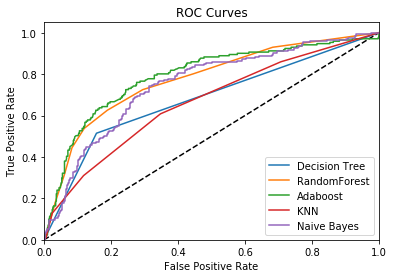

In [62]:
#ROC Curve
y_score_tree = tree_clf.predict_proba(x_test)[:,1]
y_score_rf = rf_clf.predict_proba(x_test)[:,1]
y_score_ab = ab_clf.predict_proba(x_test)[:,1]
y_score_knn = knn_clf.predict_proba(x_test)[:,1]
y_score_nb = nb_clf.predict_proba(x_test)[:,1]
# y_score_svm = svm_clf.predict_proba(x_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
# fpr_svm, tpr_svm, _ = roc_curve(y_test,y_score_svm)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')
# plt.plot(fpr_svm,tpr_svm,label='SVM')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [63]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, new_x.iloc[:,indices[f]].name, importances[indices[f]]))

Feature ranking:
1. review_count (0.314142)
2. 3m_count (0.106020)
3. 2m_count (0.101000)
4. 1m_count (0.100391)
5. 3m_count_similar (0.089604)
6. income (0.075173)
7. 0.5m_count (0.075097)
8. 2m_count_similar (0.059456)
9. is_chain (0.050591)
10. is_fastfood (0.028525)


(-1, 10)

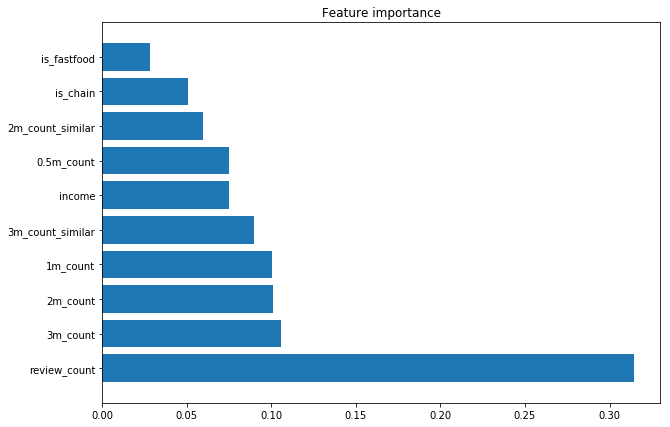

In [64]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], new_x.iloc[:,indices].columns)
plt.ylim([-1, 10])